In [1]:
import pandas as pd
import scanpy as sc
import scipy
import anndata
import scirpy as ir

# SCC Data

Download files here
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE123813 and save to '../data/SCC/raw/'

# Uncomment the cell during for first use

In [2]:
# Very slow (takes about 30min), so save as pickle for future use
scc_scRNA_counts = pd.read_csv('../data/SCC/raw/GSE123813_scc_scRNA_counts.txt', sep='\t')
scc_scRNA_counts.to_pickle('../data/SCC/scc_scRNA_counts.pkl')

In [3]:
scc_scRNA_counts = pd.read_pickle('../data/SCC/scc_scRNA_counts.pkl')
scc_scRNA_counts = scc_scRNA_counts.transpose()
scc_scRNA_counts.index.name = 'cell.id'
scc_scRNA_counts.head()

,RP11-34P13.7,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP11-206L10.9,LINC00115,FAM41C,NOC2L,KLHL17,...,LINC01589,MIOX,CH507-39O4.2,CH507-145C22.1,CH507-210P18.4,TCP10L,TFF3,LINC00334,RP1-153P14.5,CTD-2306A12.1
cell.id,,,,,,,,,,,,,,,,,,,,,
scc.su010.pre.rep1_AAACCTGCATGTTCCC,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
scc.su010.pre.rep1_AAACGGGAGGACAGAA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scc.su010.pre.rep1_AAACGGGCAAGTCTAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scc.su010.pre.rep1_AAACGGGGTAGTACCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
scc.su010.pre.rep1_AAACGGGGTGATAAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
metadata = pd.read_csv('../data/SCC/raw/GSE123813_scc_metadata.txt', sep='\t', index_col=0)
scc_all_metadata = pd.concat([scc_scRNA_counts[['FO538757.2', 'AP006222.2']], metadata], axis=1).drop(columns=['FO538757.2', 'AP006222.2'])
scc_all_metadata.head()

,patient,treatment,cluster,UMAP1,UMAP2
cell.id,,,,,
scc.su010.pre.rep1_AAACCTGCATGTTCCC,su010,pre,CD8_naive,-5.055816,3.093178
scc.su010.pre.rep1_AAACGGGAGGACAGAA,su010,pre,CD8_naive,-4.361540,2.970602
scc.su010.pre.rep1_AAACGGGCAAGTCTAC,su010,pre,Th17,2.955230,-4.796993
scc.su010.pre.rep1_AAACGGGGTAGTACCT,su010,pre,CD8_naive,-4.597772,2.647269
scc.su010.pre.rep1_AAACGGGGTGATAAAC,su010,pre,CD8_naive,-3.909451,3.647786


In [5]:
X = scipy.sparse.csr_matrix(scc_scRNA_counts.values)
adata = anndata.AnnData(X=X, obs=scc_all_metadata, var={'gene_ids' : list(scc_scRNA_counts.columns)})
adata.var.set_index('gene_ids', inplace=True)
adata.write('../data/SCC/scc_scRNA.h5ad')
adata

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'cluster' as categorical


AnnData object with n_obs × n_vars = 26016 × 18347
    obs: 'patient', 'treatment', 'cluster', 'UMAP1', 'UMAP2'

#### UMAP of all metadata

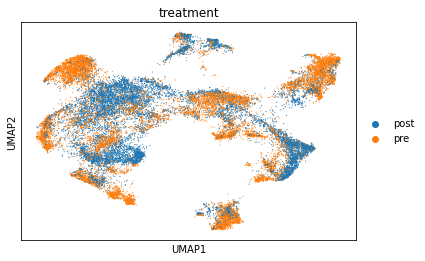

In [6]:
adata.obsm['umap'] = adata.obs[['UMAP1', 'UMAP2']].values
sc.pl.umap(adata, color='treatment')

## TCR Seq

In [7]:
scc_tcr = pd.read_csv('../data/SCC/raw/GSE123813_scc_tcr.txt', sep='\t', index_col=0)
scc_tcr.index.name = 'cell.id'
scc_tcr.head()

,cdr3s_nt,cdr3s_aa
cell.id,,
scc.su010.pre.rep1_AAACGGGAGGACAGAA,TRB:TGTGCCAGCAGCCAAGAGGCGAATGAGCAGTTCTTC,TRB:CASSQEANEQFF
scc.su010.pre.rep1_AAACGGGGTAGTACCT,TRB:TGTGCCAGCAGTTTACCTCGTTTTCTAGCCCACGACAATGAG...,TRB:CASSLPRFLAHDNEQFF
scc.su010.pre.rep1_AAACGGGGTGATAAAC,TRB:TGTGCCAGCAGCTTAGCCGCGGGCCGGGACAGTTTCCTTCTT...,TRB:CASSLAAGRDSFLLGANTGELFF
scc.su010.pre.rep1_AAACGGGTCAAAGTAG,TRA:TGTGCAGGTGAGAAAAGCAGCGGAGACAAGCTGACTTTT;TR...,TRA:CAGEKSSGDKLTF;TRA:CAVGSNAGGTSYGKLTF;TRB:CA...
scc.su010.pre.rep1_AAAGATGAGCTAACAA,TRA:TGTGCTGTGGACAACTCTGGGGCTGGGAGTTACCAACTCACTTTC,TRA:CAVDNSGAGSYQLTF


All sequences (e.g. TRA + TRB) are saved in one string.
Split sequences into separate columns

In [8]:
tcr_cells = []
for idx, row in scc_tcr.iterrows():
    cell = {'cell.id': row.name,
           'cdr3s_nt': row['cdr3s_nt'],
           'cdr3s_aa': row['cdr3s_aa']}
    
    # Iterate through all nucleotide sequences
    tra_counter = 0
    trb_counter = 0
    for num, seq in enumerate(row['cdr3s_nt'].split(';')):
        if 'TRA:' in seq:
            cell[f'cdr3_nt_alpha_{tra_counter}'] = seq.split('TRA:')[1]
            tra_counter += 1
        
        if 'TRB:' in seq:
            cell[f'cdr3_nt_beta_{trb_counter}'] = seq.split('TRB:')[1]
            trb_counter += 1
    
    # Iterate through all amino acid sequences
    tra_aa_counter = 0
    trb_aa_counter = 0
    for num, seq in enumerate(row['cdr3s_aa'].split(';')):
        if 'TRA:' in seq:
            cell[f'cdr3_aa_alpha_{tra_aa_counter}'] = seq.split('TRA:')[1]
            tra_aa_counter += 1
        
        if 'TRB:' in seq:
            cell[f'cdr3_aa_beta_{trb_aa_counter}'] = seq.split('TRB:')[1]
            trb_aa_counter += 1
    tcr_cells.append(cell)

In [9]:
scc_tcr = pd.DataFrame(tcr_cells).set_index('cell.id')
scc_tcr = scc_tcr[['cdr3s_nt', 'cdr3s_aa', 
                   'cdr3_nt_alpha_0', 'cdr3_nt_alpha_1', 'cdr3_nt_alpha_2', 'cdr3_nt_alpha_3', 
                   'cdr3_nt_beta_0', 'cdr3_nt_beta_1', 'cdr3_nt_beta_2', 'cdr3_nt_beta_3',
                   'cdr3_aa_alpha_0', 'cdr3_aa_alpha_1', 'cdr3_aa_alpha_2', 'cdr3_aa_alpha_3',
                   'cdr3_aa_beta_0', 'cdr3_aa_beta_1', 'cdr3_aa_beta_2', 'cdr3_aa_beta_3']]
scc_tcr.head()

,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,cdr3_nt_alpha_3,cdr3_nt_beta_0,cdr3_nt_beta_1,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,
scc.su010.pre.rep1_AAACGGGAGGACAGAA,TRB:TGTGCCAGCAGCCAAGAGGCGAATGAGCAGTTCTTC,TRB:CASSQEANEQFF,NaN,NaN,NaN,NaN,TGTGCCAGCAGCCAAGAGGCGAATGAGCAGTTCTTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSQEANEQFF,NaN,NaN,NaN
scc.su010.pre.rep1_AAACGGGGTAGTACCT,TRB:TGTGCCAGCAGTTTACCTCGTTTTCTAGCCCACGACAATGAG...,TRB:CASSLPRFLAHDNEQFF,NaN,NaN,NaN,NaN,TGTGCCAGCAGTTTACCTCGTTTTCTAGCCCACGACAATGAGCAGT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSLPRFLAHDNEQFF,NaN,NaN,NaN
scc.su010.pre.rep1_AAACGGGGTGATAAAC,TRB:TGTGCCAGCAGCTTAGCCGCGGGCCGGGACAGTTTCCTTCTT...,TRB:CASSLAAGRDSFLLGANTGELFF,NaN,NaN,NaN,NaN,TGTGCCAGCAGCTTAGCCGCGGGCCGGGACAGTTTCCTTCTTGGTG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSLAAGRDSFLLGANTGELFF,NaN,NaN,NaN
scc.su010.pre.rep1_AAACGGGTCAAAGTAG,TRA:TGTGCAGGTGAGAAAAGCAGCGGAGACAAGCTGACTTTT;TR...,TRA:CAGEKSSGDKLTF;TRA:CAVGSNAGGTSYGKLTF;TRB:CA...,TGTGCAGGTGAGAAAAGCAGCGGAGACAAGCTGACTTTT,TGTGCTGTGGGTTCTAATGCTGGTGGTACTAGCTATGGAAAGCTGA...,NaN,NaN,TGTGCCAGCAGCTTTACTAGCGGGAGCTACGAGCAGTACTTC,NaN,NaN,NaN,CAGEKSSGDKLTF,CAVGSNAGGTSYGKLTF,NaN,NaN,CASSFTSGSYEQYF,NaN,NaN,NaN
scc.su010.pre.rep1_AAAGATGAGCTAACAA,TRA:TGTGCTGTGGACAACTCTGGGGCTGGGAGTTACCAACTCACTTTC,TRA:CAVDNSGAGSYQLTF,TGTGCTGTGGACAACTCTGGGGCTGGGAGTTACCAACTCACTTTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAVDNSGAGSYQLTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate number of Dual alpha IRs
len(scc_tcr) - scc_tcr['cdr3_nt_alpha_1'].isnull().sum()

1451

In [11]:
# Calculate number of Multichain IRs
len(scc_tcr) - scc_tcr['cdr3_nt_alpha_2'].isnull().sum()

72

In [12]:
scc_tcr_joined = pd.concat([scc_tcr], axis=1)
scc_tcr_joined.to_pickle('../data/BCC/bcc_tcr_raw.pkl')
scc_tcr_joined.head()

,cdr3s_nt,cdr3s_aa,cdr3_nt_alpha_0,cdr3_nt_alpha_1,cdr3_nt_alpha_2,cdr3_nt_alpha_3,cdr3_nt_beta_0,cdr3_nt_beta_1,cdr3_nt_beta_2,cdr3_nt_beta_3,cdr3_aa_alpha_0,cdr3_aa_alpha_1,cdr3_aa_alpha_2,cdr3_aa_alpha_3,cdr3_aa_beta_0,cdr3_aa_beta_1,cdr3_aa_beta_2,cdr3_aa_beta_3
cell.id,,,,,,,,,,,,,,,,,,
scc.su010.pre.rep1_AAACGGGAGGACAGAA,TRB:TGTGCCAGCAGCCAAGAGGCGAATGAGCAGTTCTTC,TRB:CASSQEANEQFF,NaN,NaN,NaN,NaN,TGTGCCAGCAGCCAAGAGGCGAATGAGCAGTTCTTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSQEANEQFF,NaN,NaN,NaN
scc.su010.pre.rep1_AAACGGGGTAGTACCT,TRB:TGTGCCAGCAGTTTACCTCGTTTTCTAGCCCACGACAATGAG...,TRB:CASSLPRFLAHDNEQFF,NaN,NaN,NaN,NaN,TGTGCCAGCAGTTTACCTCGTTTTCTAGCCCACGACAATGAGCAGT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSLPRFLAHDNEQFF,NaN,NaN,NaN
scc.su010.pre.rep1_AAACGGGGTGATAAAC,TRB:TGTGCCAGCAGCTTAGCCGCGGGCCGGGACAGTTTCCTTCTT...,TRB:CASSLAAGRDSFLLGANTGELFF,NaN,NaN,NaN,NaN,TGTGCCAGCAGCTTAGCCGCGGGCCGGGACAGTTTCCTTCTTGGTG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASSLAAGRDSFLLGANTGELFF,NaN,NaN,NaN
scc.su010.pre.rep1_AAACGGGTCAAAGTAG,TRA:TGTGCAGGTGAGAAAAGCAGCGGAGACAAGCTGACTTTT;TR...,TRA:CAGEKSSGDKLTF;TRA:CAVGSNAGGTSYGKLTF;TRB:CA...,TGTGCAGGTGAGAAAAGCAGCGGAGACAAGCTGACTTTT,TGTGCTGTGGGTTCTAATGCTGGTGGTACTAGCTATGGAAAGCTGA...,NaN,NaN,TGTGCCAGCAGCTTTACTAGCGGGAGCTACGAGCAGTACTTC,NaN,NaN,NaN,CAGEKSSGDKLTF,CAVGSNAGGTSYGKLTF,NaN,NaN,CASSFTSGSYEQYF,NaN,NaN,NaN
scc.su010.pre.rep1_AAAGATGAGCTAACAA,TRA:TGTGCTGTGGACAACTCTGGGGCTGGGAGTTACCAACTCACTTTC,TRA:CAVDNSGAGSYQLTF,TGTGCTGTGGACAACTCTGGGGCTGGGAGTTACCAACTCACTTTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAVDNSGAGSYQLTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
tcr_cells = []
for idx, row in scc_tcr_joined.iterrows():
    cell = ir.io.IrCell(cell_id=row.name)
    for i in range(4):  # reversed so the first TRA and TRB will be saved in multichain cells
        if type(row[f'cdr3_aa_alpha_{i}']) is str:
            alpha_chain = ir.io.IrChain(
                locus="TRA",
                cdr3=row[f"cdr3_aa_alpha_{i}"],
                cdr3_nt=row[f"cdr3_nt_alpha_{i}"],
                expr=0,
                is_productive=True
            )
            cell.add_chain(alpha_chain)

        if type(row[f'cdr3_aa_beta_{i}']) is str:
            beta_chain = ir.io.IrChain(
                locus="TRB",
                cdr3=row[f"cdr3_aa_beta_{i}"],
                cdr3_nt=row[f"cdr3_nt_beta_{i}"],
                expr=0,
                is_productive=True
            )
            cell.add_chain(beta_chain)
    tcr_cells.append(cell)


In [14]:
adata_tcr = ir.io.from_ir_objs(tcr_cells)
adata_tcr.write('../data/SCC/scc_tcr_scirpy.h5ad')
pd.options.display.max_columns = None
adata_tcr.obs.head(5)

... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical


,multi_chain,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,IR_VDJ_1_cdr3_nt,IR_VDJ_2_cdr3_nt,IR_VJ_1_expr,IR_VJ_2_expr,IR_VDJ_1_expr,IR_VDJ_2_expr,IR_VJ_1_expr_raw,IR_VJ_2_expr_raw,IR_VDJ_1_expr_raw,IR_VDJ_2_expr_raw,IR_VJ_1_v_gene,IR_VJ_2_v_gene,IR_VDJ_1_v_gene,IR_VDJ_2_v_gene,IR_VJ_1_d_gene,IR_VJ_2_d_gene,IR_VDJ_1_d_gene,IR_VDJ_2_d_gene,IR_VJ_1_j_gene,IR_VJ_2_j_gene,IR_VDJ_1_j_gene,IR_VDJ_2_j_gene,IR_VJ_1_c_gene,IR_VJ_2_c_gene,IR_VDJ_1_c_gene,IR_VDJ_2_c_gene,IR_VJ_1_junction_ins,IR_VJ_2_junction_ins,IR_VDJ_1_junction_ins,IR_VDJ_2_junction_ins,has_ir
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
scc.su010.pre.rep1_AAACGGGAGGACAGAA,False,NaN,NaN,TRB,NaN,None,None,CASSQEANEQFF,None,None,None,TGTGCCAGCAGCCAAGAGGCGAATGAGCAGTTCTTC,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
scc.su010.pre.rep1_AAACGGGGTAGTACCT,False,NaN,NaN,TRB,NaN,None,None,CASSLPRFLAHDNEQFF,None,None,None,TGTGCCAGCAGTTTACCTCGTTTTCTAGCCCACGACAATGAGCAGT...,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
scc.su010.pre.rep1_AAACGGGGTGATAAAC,False,NaN,NaN,TRB,NaN,None,None,CASSLAAGRDSFLLGANTGELFF,None,None,None,TGTGCCAGCAGCTTAGCCGCGGGCCGGGACAGTTTCCTTCTTGGTG...,None,NaN,NaN,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
scc.su010.pre.rep1_AAACGGGTCAAAGTAG,False,TRA,TRA,TRB,NaN,CAVGSNAGGTSYGKLTF,CAGEKSSGDKLTF,CASSFTSGSYEQYF,None,TGTGCTGTGGGTTCTAATGCTGGTGGTACTAGCTATGGAAAGCTGA...,TGTGCAGGTGAGAAAAGCAGCGGAGACAAGCTGACTTTT,TGTGCCAGCAGCTTTACTAGCGGGAGCTACGAGCAGTACTTC,None,0.0,0.0,0.0,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True
scc.su010.pre.rep1_AAAGATGAGCTAACAA,False,TRA,NaN,NaN,NaN,CAVDNSGAGSYQLTF,None,None,None,TGTGCTGTGGACAACTCTGGGGCTGGGAGTTACCAACTCACTTTC,None,None,None,0.0,NaN,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,True


# Join TCR with gene expression data

In [15]:
ir.pp.merge_with_ir(adata, adata_tcr)
adata.write('../data/SCC/scc_tcr_and_gene.h5ad')

... storing 'multi_chain' as categorical


# Single cell data preprocessing

Adapted from single cell preprocessing maren?

In [16]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import seaborn as sb
sb.set_style('white')

In [17]:
path_base = '../data/SCC/'
path_merged = path_base + 'scc_tcr_and_gene.h5ad'
path_filtered = path_base + '02_scc_filtered_tcr.h5ad'
path_tcr_split = path_base + '03_scc_train_test_split.h5ad'
path_normalized = path_base + '04_scc_normalized_tcr.h5ad'
path_logged = path_base + '05_scc_logged.h5ad'
path_highlyvar = path_base + '06_scc_highly_var_5000.h5ad'

## Filtering

In [18]:
adata = sc.read_h5ad(path_merged)

In [19]:
adata.obs['n_counts'] = adata.X.A.sum(1)
adata.obs['log_counts'] = np.log10(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X.A>0).sum(1)

mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
mt_gene_index = np.where(mt_gene_mask)[0]
adata.obs['mt_fraction'] = adata.X.A[:, mt_gene_index].sum(1) / adata.X.A.sum(1)

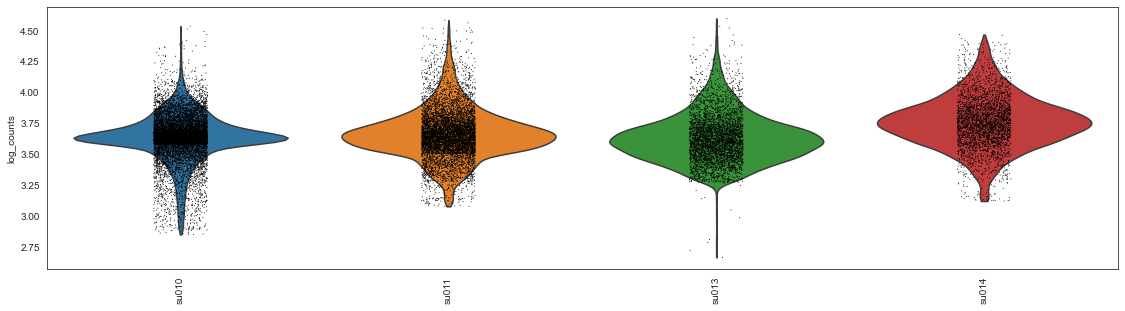

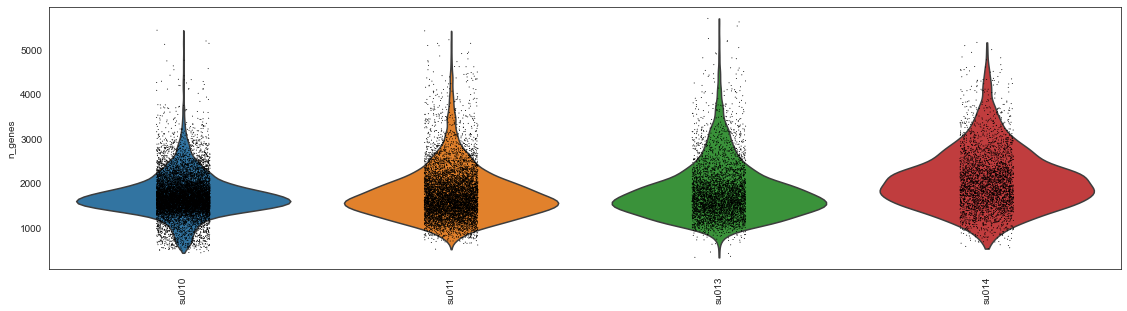

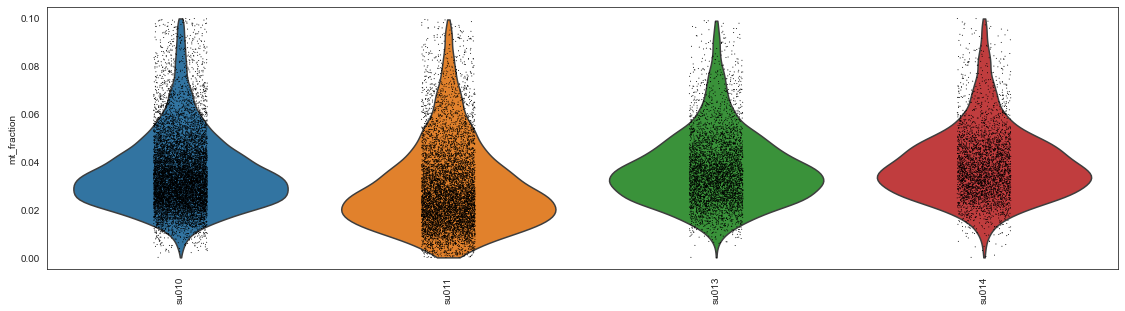

In [20]:
rcParams['figure.figsize'] = (15, 5)
sc.pl.violin(adata, ['log_counts'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['n_genes'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['mt_fraction'], groupby='patient', size=1, log=False, rotation=90)

<Axes:title={'center':'mt fraction'}, xlabel='n_counts', ylabel='n_genes'>

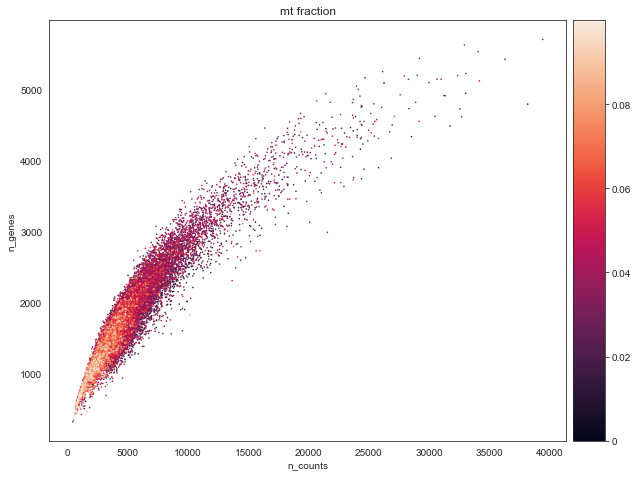

In [21]:
rcParams['figure.figsize'] = (8, 8)
sc.pl.scatter(adata, y='n_genes', x='n_counts', color='mt_fraction', size=10, show=False)

In [22]:
adata.obs['n_genes'].shape

(26016,)

In [23]:
print(f'number of cells: {len(adata)}')
adata = adata[adata.obs['mt_fraction'] < 0.2]
print(f'number of cells after mt filter: {len(adata)}')

number of cells: 26016
number of cells after mt filter: 26016


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [24]:
print(f'number of cells: {len(adata)}')
adata = adata[adata.obs['n_counts'] > 1000]
print(f'number of cells after low count filter: {len(adata)}')
sc.pp.filter_cells(adata, max_counts=10000)
print(f'number of cells after high count filter: {len(adata)}')

number of cells: 26016
number of cells after low count filter: 25893


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


number of cells after high count filter: 24582


In [25]:
print(f'number of cells: {len(adata)}')
adata = adata[adata.obs['n_genes'] > 500]
print(f'number of cells low gene filter: {len(adata)}')

number of cells: 24582
number of cells low gene filter: 24580


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [26]:
print(f'number of genes: {len(adata.var)}')
sc.pp.filter_genes(adata, min_cells=10)
print(f'number of genes after seldom gene filter: {len(adata.var)}')

number of genes: 18347


Trying to set attribute `.var` of view, copying.


number of genes after seldom gene filter: 15444


## Doublet detection with scrublet

In [27]:
import scrublet as scr
import scipy.io
import time
import seaborn as sb

In [28]:
adata.obs['doublet_score'] = np.zeros(adata.shape[0])
adata.obs['doublet'] = np.zeros(adata.shape[0])

In [29]:
# filtering / preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 50

# doublet detector parameters
expected_doublet_rate = 0.02
sim_doublet_ratio = 3
n_neighbors = 15

for batch in enumerate(adata.obs['patient'].cat.categories):
    print(batch)
    t0 = time.time()
    idx = np.flatnonzero(adata.obs['patient']==batch[1])
    scrub = scr.Scrublet(counts_matrix = adata[idx, :].X,
                        n_neighbors = n_neighbors,
                        sim_doublet_ratio = sim_doublet_ratio,
                        expected_doublet_rate = expected_doublet_rate)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts = min_counts,
                                                              min_cells = min_cells,
                                                              n_prin_comps = n_pc,
                                                              use_approx_neighbors = True,
                                                              get_doublet_neighbor_parents = False)
    adata.obs['doublet_score'].iloc[idx] = doublet_scores
    adata.obs['doublet'].iloc[idx] = predicted_doublets
    t1 = time.time()
    print('Elapsed time: {:.1f} seconds'.format(t1-t0))

(0, 'su010')
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 26.3%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 6.3%
Elapsed time: 11.2 seconds
Elapsed time: 11.6 seconds
(1, 'su011')


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 33.3%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 4.4%
Elapsed time: 8.3 seconds
Elapsed time: 8.6 seconds
(2, 'su013')
Preprocessing...


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 20.5%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 8.8%
Elapsed time: 3.9 seconds
Elapsed time: 4.1 seconds
(3, 'su014')
Preprocessing...


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 32.0%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 3.8%
Elapsed time: 3.3 seconds
Elapsed time: 3.5 seconds


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='doublet_score'>

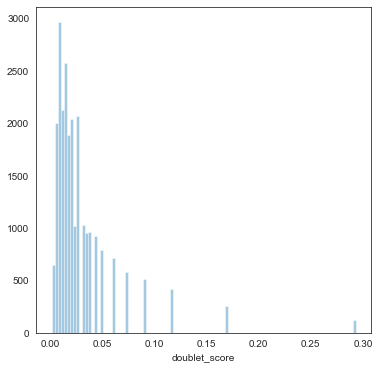

In [30]:
rcParams['figure.figsize'] = (6, 6)
sb.distplot(adata.obs['doublet_score'], bins=100, kde=False)

... storing 'doublet' as categorical


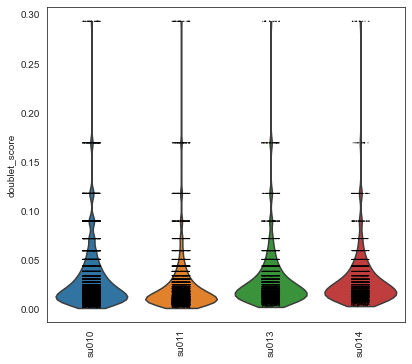

In [31]:
sc.pl.violin(adata, ['doublet_score'], groupby='patient', size=1, log=False, rotation=90)

In [32]:
thr = 0.05
idx_filter = adata.obs['doublet_score'] <= thr

print(f'number of cells: {len(adata)}')
adata = adata[idx_filter].copy()
print(f'Number of cells after double filter: {adata.n_obs}')

number of cells: 24580
Number of cells after double filter: 21184


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


QC after filtering

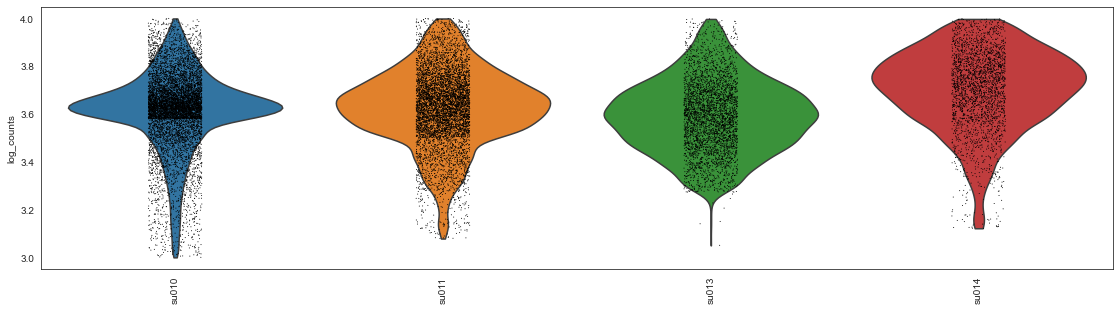

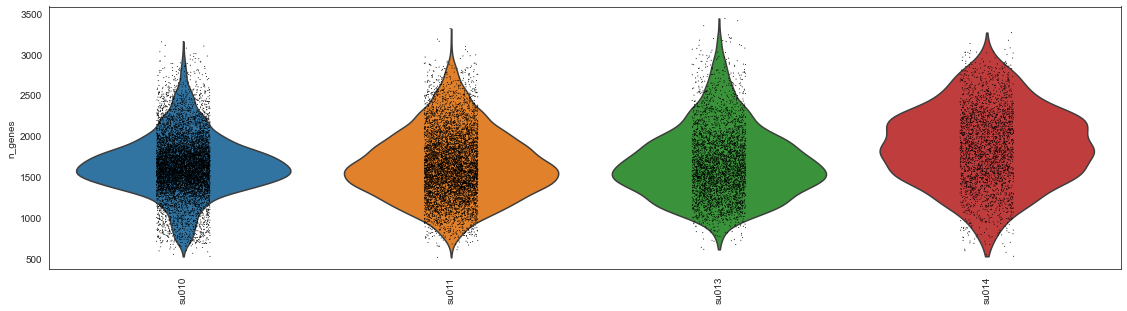

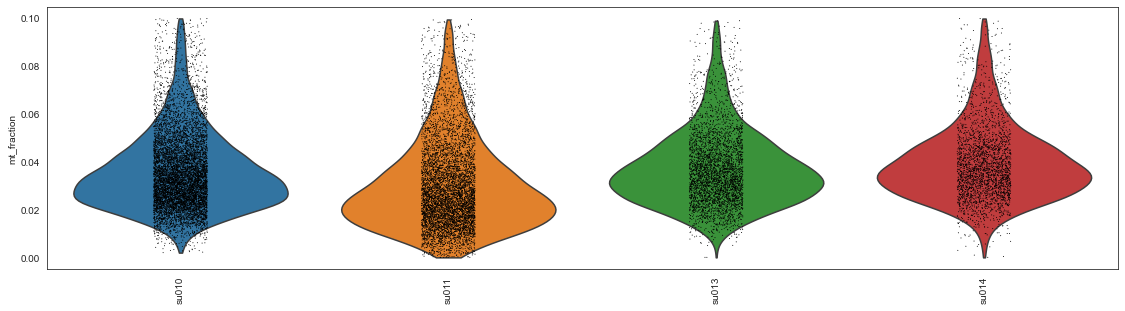

In [33]:
rcParams['figure.figsize'] = (15, 5)
sc.pl.violin(adata, ['log_counts'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['n_genes'], groupby='patient', size=1, log=False, rotation=90)
sc.pl.violin(adata, ['mt_fraction'], groupby='patient', size=1, log=False, rotation=90)

In [34]:
sc.write(adata=adata, filename=path_filtered)

## Filter cells with productive single IR 

In [35]:
adata = sc.read_h5ad(path_filtered)

In [36]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['has_ir']=='True']
print(f'Number of cells with IR: {adata.n_obs}')

Number of cells: 21184
Number of cells with IR: 18636


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [37]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['multi_chain']=='False']

print(f'Number of cells without >2 chains: {adata.n_obs}')

adata = adata[adata.obs['IR_VJ_2_cdr3']=='None']
adata = adata[adata.obs['IR_VDJ_2_cdr3']=='None']

print(f'Number of cells with =1 per chain: {adata.n_obs}')

Number of cells: 18636
Number of cells without >2 chains: 18606
Number of cells with =1 per chain: 17223


## Filter unpaired Sequences

In [38]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['IR_VDJ_1_cdr3'] != 'None']
print(f'Number of cells with beta chain: {adata.n_obs}')

Number of cells: 17223
Number of cells with beta chain: 16392


In [39]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['IR_VJ_1_cdr3'] != 'None']
print(f'Number of cells with alpha chain: {adata.n_obs}')

Number of cells: 16392
Number of cells with alpha chain: 12362


Sanity check: only a single CDR3alpha and CDR3beta chain is present

In [40]:
def check_invalids(sequence):
    allowed_letters = 'GALMFWKQESPVICYHRNDT'
    for letter in sequence:
        if letter not in allowed_letters:
            return False
    return True

for seq_alpha in adata.obs['IR_VJ_1_cdr3']:
    if not check_invalids(seq_alpha):
        print(seq_alpha)
for seq_beta in adata.obs['IR_VDJ_1_cdr3']:
    if not check_invalids(seq_beta):
        print(seq_beta)

## Filter cells by cluster annotation

The dataset provided cluster annotation (cluster, cluster_tcr and sort) indicating the cell type.

In [41]:
print(f'Number of cells: {adata.n_obs}')
adata = adata[adata.obs['cluster'] != 'Macrophages']
adata.obs['cluster'].cat.remove_unused_categories(inplace=True)
print(f'Number of cells without macrophages: {adata.n_obs}')

Number of cells: 12362
Number of cells without macrophages: 12362


## Clonotype Annotation

In [42]:
adata.obs['TRA+TRB'] = adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)
clono_dict = {clone: idx for idx, clone in enumerate(adata.obs['TRA+TRB'].unique())}
adata.obs['clonotype'] = adata.obs['TRA+TRB'].map(clono_dict)
print(len(adata.obs['clonotype'].unique()))
adata.obs['clonotype'].value_counts()

Trying to set attribute `.obs` of view, copying.


4762


9       517
3002    429
12      345
4193    332
1       235
       ... 
1994      1
4043      1
4051      1
2010      1
2043      1
Name: clonotype, Length: 4762, dtype: int64

## Embed TR

Append both chains, add start ('<'), stop ('>') and seperator ('+') token. For training purpose IR data might be needed as one hot vector.

In [43]:
import sys
sys.path.append('../')
from tcr_embedding import utils_preprocessing as utils

In [44]:
adata.obs['TRA+TRB'] = adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)
pad = adata.obs['TRA+TRB'].str.len().max()
pad = int(pad)
pad

43

In [45]:
aa_to_id = {'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13,
            'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}
utils.aa_encoding(adata, read_col='TRA+TRB', ohe_col='one_hot', label_col='tcr_seq', length_col='seq_len', pad=pad, aa_to_id=aa_to_id, start_end_symbol=True)


In [46]:
print(adata.obsm['tcr_seq'].shape)
print(adata.obsm['one_hot'].shape)
print(adata.uns['aa_to_id'])

(12362, 45)
(12362, 45, 24)
{'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}


In [47]:
max_length_alpha = adata.obs['IR_VJ_1_cdr3'].str.len().max()
max_length_beta = adata.obs['IR_VDJ_1_cdr3'].str.len().max()
max_length = max(max_length_alpha, max_length_beta)

In [48]:
aa_to_id = adata.uns['aa_to_id']
utils.aa_encoding(adata, read_col='IR_VJ_1_cdr3', label_col='alpha_seq', length_col='alpha_len', pad=max_length, aa_to_id=aa_to_id, start_end_symbol=False)
utils.aa_encoding(adata, read_col='IR_VDJ_1_cdr3', label_col='beta_seq', length_col='beta_len', pad=max_length, aa_to_id=aa_to_id, start_end_symbol=False)

In [49]:
print(max_length_alpha)
print(max_length_beta)

27
23


## Train-Val-Test Split

In [50]:
adata.obs['patient+treatment'] = adata.obs['patient'].astype(str) + '_' + adata.obs['treatment'].astype(str)
adata.obs['patient+treatment'].sample(10)

cell.id
scc.su010.post.cd39_ACTTTCAGTCAACATC    su010_post
scc.su010.pre.rep2_GCACTCTGTTGATTGC      su010_pre
scc.su013.pre_GGACGTCGTATCGCAT           su013_pre
scc.su010.post_ATTCTACTCTCAACTT         su010_post
scc.su013.post_GACACGCAGGAATGGA         su013_post
scc.su013.pre_CACCAGGAGCCGCCTA           su013_pre
scc.su010.pre.rep1_GCTGCGAGTAATAGCA      su010_pre
scc.su010.post.cd39_CTCGTACGTCGCATAT    su010_post
scc.su011.post_TCACGAAGTTCCACTC         su011_post
scc.su011.pre.rep2_GACCAATGTGAAATCA      su011_pre
Name: patient+treatment, dtype: object

In [51]:
random_seed = 15
# Create Train-Val and Test set
train_val, test = utils.stratified_group_shuffle_split(adata.obs, stratify_col='patient+treatment', group_col='clonotype', val_split=0.20, random_seed=random_seed)
# Split Train-Val into Train and Val set
train, val = utils.stratified_group_shuffle_split(train_val, stratify_col='patient+treatment', group_col='clonotype', val_split=0.25, random_seed=random_seed)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 95.27it/s]


In [52]:
print('Train Samples: ', len(train))
print('Train Ratio: ', len(train) / len(adata.obs))
print('Val Samples: ', len(val))
print('Val Ratio: ', len(val) / len(adata.obs))
print('Test Samples: ', len(test))
print('Test Ratio: ', len(test) / len(adata.obs))

Train Samples:  8601
Train Ratio:  0.6957612036887235
Val Samples:  1961
Val Ratio:  0.15863128943536645
Test Samples:  1800
Test Ratio:  0.14560750687591004


### Visualize Distribution

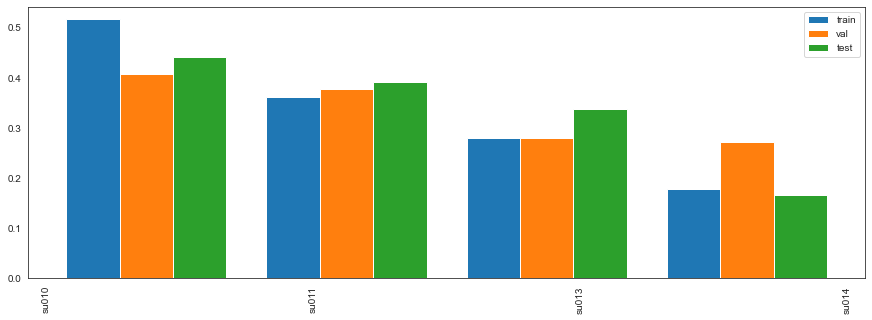

In [53]:
pl.figure(figsize=(15,5))
pl.hist([train['patient'], val['patient'], test['patient']], density=True, bins=len(train['patient'].unique()), label=['train', 'val', 'test'])
pl.xticks(rotation='vertical')
pl.legend(loc='upper right')
pl.show()

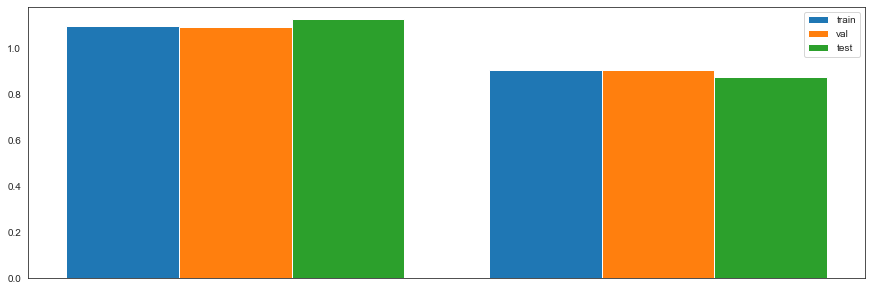

In [54]:
pl.figure(figsize=(15,5))
pl.hist([train['treatment'], val['treatment'], test['treatment']], density=True, bins=len(train['treatment'].unique()), label=['train', 'val', 'test'])
pl.xticks(rotation='vertical')
pl.legend(loc='upper right')
pl.show()

In [55]:
adata.obs.loc[train.index, 'set'] = 'train'
adata.obs.loc[val.index, 'set'] = 'val'
adata.obs.loc[test.index, 'set'] = 'test'
adata.obs['set'].value_counts()

train    8601
val      1961
test     1800
Name: set, dtype: int64

## Add response information

The Yost paper specifies whether the treatment of a patient had a response or not. (Suppl. Material BioRxiv, tables)

In [56]:
patients_response = ['su001', 'su002', 'su003', 'su004', 'su009', 'su012']
patient_non_response = [patient for patient in adata.obs['patient'].unique().tolist() if patient not in patients_response]
patient_non_response

['su010', 'su011', 'su013', 'su014']

In [57]:
response = ['responsive' if patient in patients_response else 'non-responsive' for patient in adata.obs['patient']]
adata.obs['response'] = response
response_bin = [True if resp == 'responsive' else False for resp in response]
print(f'Amount Response cells: {sum(response_bin)}')
print(f'Amount non Response cells: {len(response_bin)-sum(response_bin)}')

Amount Response cells: 0
Amount non Response cells: 12362


In [58]:
adata.write_h5ad(path_tcr_split, compression='gzip')

... storing 'TRA+TRB' as categorical
... storing 'patient+treatment' as categorical
... storing 'set' as categorical
... storing 'response' as categorical


## Normalization + Log1p

In [59]:
adata = sc.read_h5ad(path_tcr_split)

In [60]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.write(adata=adata, filename=path_normalized)

In [61]:
sc.pp.log1p(adata)
sc.write(adata=adata, filename=path_logged)

## Highly Variable Genes

In [62]:
adata = sc.read_h5ad(path_logged) # todo

In [63]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000, batch_key='patient')
print('Shape before: ', adata.shape)
adata = adata[:, adata.var['highly_variable']]
print('Shape after: ', adata.shape)

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Shape before:  (12362, 15444)
Shape after:  (12362, 5000)


C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [64]:
sc.write(adata=adata, filename=path_highlyvar)